In [ ]:
## Standard libraries
import os
import math
import numpy as np
import time

## Imports for plotting
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import to_rgba
import seaborn as sns
sns.set()

try:
    from matplotlib_inline.backend_inline import set_matplotlib_formats
    set_matplotlib_formats('svg', 'pdf')
except ImportError:
    # Fallback: configure matplotlib directly
    import matplotlib
    matplotlib.rcParams['savefig.format'] = 'svg'

## Progress bar
from tqdm.notebook import tqdm

In [2]:
import torch
print(torch.__version__)

2.9.0


Tensors 

In [13]:
torch.manual_seed(42)

Tensor shape: torch.Size([2, 3, 4])
Tensor:
tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]],

        [[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]]])


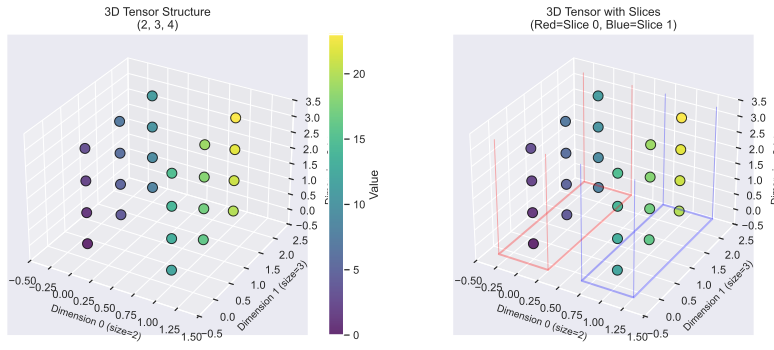


Tensor Structure Breakdown:

Slice 0 (shape: torch.Size([3, 4])):
tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

Slice 1 (shape: torch.Size([3, 4])):
tensor([[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]])


In [4]:
import torch
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Create a tensor with shape (2, 3, 4) filled with values for visualization
tensor = torch.arange(24).reshape(2, 3, 4)
print(f"Tensor shape: {tensor.shape}")
print(f"Tensor:\n{tensor}")

# Create 3D visualization
fig = plt.figure(figsize=(12, 5))

# First subplot: 3D scatter plot showing positions
ax1 = fig.add_subplot(121, projection='3d')

# Generate coordinates for each element
x_coords, y_coords, z_coords = [], [], []
values = []

for i in range(2):      # First dimension
    for j in range(3):  # Second dimension
        for k in range(4):  # Third dimension
            x_coords.append(i)
            y_coords.append(j)
            z_coords.append(k)
            values.append(tensor[i, j, k].item())

# Create scatter plot with color coding
scatter = ax1.scatter(x_coords, y_coords, z_coords, 
                     c=values, cmap='viridis', 
                     s=100, alpha=0.8, edgecolors='black')

ax1.set_xlabel('Dimension 0 (size=2)', fontsize=10)
ax1.set_ylabel('Dimension 1 (size=3)', fontsize=10)
ax1.set_zlabel('Dimension 2 (size=4)', fontsize=10)
ax1.set_title('3D Tensor Structure\n(2, 3, 4)', fontsize=12)
ax1.set_xlim(-0.5, 1.5)
ax1.set_ylim(-0.5, 2.5)
ax1.set_zlim(-0.5, 3.5)
plt.colorbar(scatter, ax=ax1, label='Value')

# Second subplot: Show each slice separately
ax2 = fig.add_subplot(122, projection='3d')

# Draw wireframe cubes for each slice
colors = ['red', 'blue']
for i in range(2):
    # Create wireframe for this slice
    x = [i-0.3, i+0.3, i+0.3, i-0.3, i-0.3]
    y = [-0.3, -0.3, 2.3, 2.3, -0.3]
    z = [-0.3, -0.3, -0.3, -0.3, -0.3]
    
    # Draw the bottom face
    ax2.plot(x, y, z, color=colors[i], alpha=0.3, linewidth=2)
    
    # Draw vertical edges
    for corner in range(4):
        ax2.plot([x[corner], x[corner]], 
                [y[corner], y[corner]], 
                [-0.3, 3.3], 
                color=colors[i], alpha=0.3, linewidth=1)

ax2.scatter(x_coords, y_coords, z_coords, 
           c=values, cmap='viridis', 
           s=100, alpha=0.8, edgecolors='black')
ax2.set_xlabel('Dimension 0 (size=2)', fontsize=10)
ax2.set_ylabel('Dimension 1 (size=3)', fontsize=10)
ax2.set_zlabel('Dimension 2 (size=4)', fontsize=10)
ax2.set_title('3D Tensor with Slices\n(Red=Slice 0, Blue=Slice 1)', fontsize=12)
ax2.set_xlim(-0.5, 1.5)
ax2.set_ylim(-0.5, 2.5)
ax2.set_zlim(-0.5, 3.5)

plt.tight_layout()
plt.show()

# Print the structure in a more readable way
print("\n" + "="*50)
print("Tensor Structure Breakdown:")
print("="*50)
for i in range(2):
    print(f"\nSlice {i} (shape: {tensor[i].shape}):")
    print(tensor[i])

### Matrix multiplication
```
How torch.matmul works with 3D tensors 

For tensors with shape (batch, m, n) and (batch, n, p):  

The last two dimensions are the matrices: (m, n) × (n, p) → (m, p)  

The batch dimensions must be broadcastable  
```

In [19]:
x = torch.rand(1, 2, 3)
print(x)
y = torch.rand(4, 3, 6)
print(y)
z = torch.matmul(x, y)
print(z)

tensor([[[0.1694, 0.2560, 0.6920],
         [0.8976, 0.3633, 0.2947]]])
tensor([[[0.0479, 0.2422, 0.0622, 0.3856, 0.6020, 0.0316],
         [0.9366, 0.8137, 0.0105, 0.2612, 0.6631, 0.3973],
         [0.4455, 0.2742, 0.9016, 0.2205, 0.9146, 0.5323]],

        [[0.6005, 0.8901, 0.4176, 0.2153, 0.4191, 0.9055],
         [0.1290, 0.6135, 0.0086, 0.7622, 0.6847, 0.5212],
         [0.7146, 0.5006, 0.7767, 0.1042, 0.4266, 0.7218]],

        [[0.9979, 0.7547, 0.1364, 0.8845, 0.3885, 0.3932],
         [0.0455, 0.4213, 0.8537, 0.5697, 0.2088, 0.6539],
         [0.3397, 0.9565, 0.0660, 0.3421, 0.0172, 0.3031]],

        [[0.6576, 0.9813, 0.5840, 0.9902, 0.5978, 0.7888],
         [0.9008, 0.9180, 0.2201, 0.9597, 0.8029, 0.2662],
         [0.2614, 0.0806, 0.6256, 0.0947, 0.7112, 0.6579]]])
tensor([[[0.5561, 0.4391, 0.6371, 0.2847, 0.9046, 0.4753],
         [0.5146, 0.5938, 0.3254, 0.5060, 1.0508, 0.3295]],

        [[0.6292, 0.6542, 0.6104, 0.3037, 0.5414, 0.7863],
         [0.7965, 1.1693, 0.6069,